#### Analyzing Stackoverflow Survey data 
#### (First Project for Data Science Nanodegree Program, Udacity)

The dataset has many attributes in it, but I am interested in following:

How many people are employed by the company or organization you work for?

How satisfied are you with your career thus far?

How satisfied are you with your current job?

How confident are you that your manager knows what they’re doing?

Do you believe that you need to be a manager to make more money?

Do you want to become a manager yourself in the future?

I want to use these fields to answer following questions:

As compared to people unsatisfied with their job, do satisfied people show more confidence in their management? 

As compared to people satisfied with their job, do unsatisfied people show more belief that they need to be a manager to make more money? 

As compared to people working in large companies, do people working for small size companies show more inclination to becoming managers in future? 

### Provide insight into the methods you chose and why you chose them

The correlation heat map is a way to see if two variables are strong connected to each other. I can reasonably answer these questions by looking at the correlation between these pairs of columns:Job Satisfication and Manager Idiot, Career Satisfication and Manager Money, Organization Size and Manager Want

To do that, let us first read in the dataset.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [22]:
## Gather necessary data to answer your questions

df_foc = df[['Respondent','OrgSize','CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant']]


In [55]:
## Handle categorical and missing data

def clean_data(df, exp_cols, response_col):
    '''
    INPUT
    df - pandas dataframe 
    exp_cols - list of columns needed for assessment 
    response_col - column of interest
    
    OUTPUT
    df - A datafram holding clean data
    
    This function cleans df using the following steps:
    1. Drop all the rows with no response_var
    2. Create df with only desired columns
    3. For each numeric variable, fill the column with the mean value of the column.
    4. Create dummy columns for all the categorical variables, drop the original columns
    '''
    df = df.dropna(subset=[response_col], axis=0)
    
    df = df[exp_cols+[response_col]]
    
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    return df

# Test: Clean data for Q1 'Respondent',
df_q1 = clean_data(df, ['JobSat'], 'MgrIdiot') 
df_q1

,JobSat_Slightly dissatisfied,JobSat_Slightly satisfied,JobSat_Very dissatisfied,JobSat_Very satisfied,MgrIdiot_Not at all confident,MgrIdiot_Somewhat confident,MgrIdiot_Very confident
2,0,1,0,0,1,0,0
3,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0
5,0,1,0,0,0,0,1
8,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...
88864,0,0,0,0,0,1,0
88867,0,0,0,0,0,0,1
88872,0,0,0,0,0,1,0
88875,0,0,0,0,0,0,1


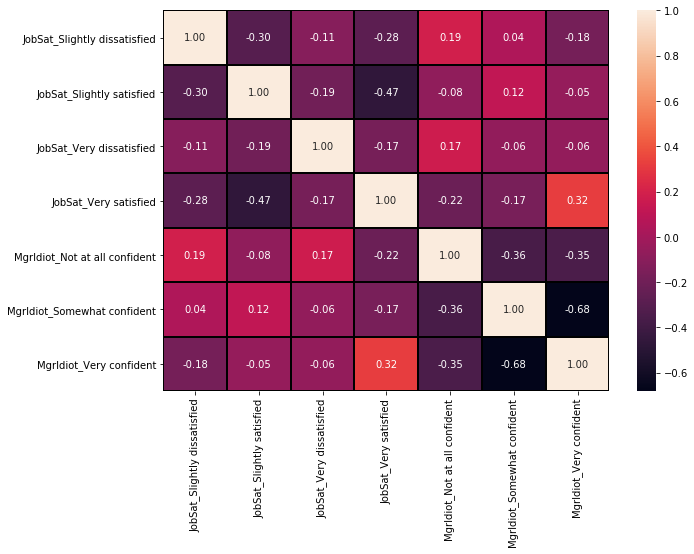

In [62]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_q1.corr(), annot=True, fmt=".2f", ax=ax,linewidths=1, linecolor='black');
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


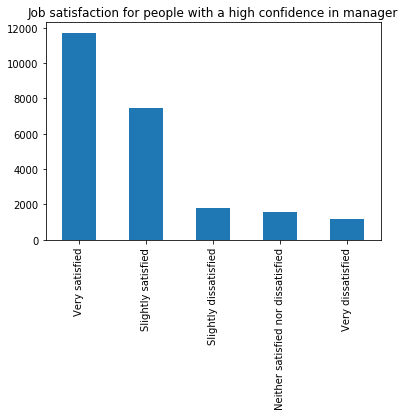

In [48]:
# Bar chart showing job satisfaction for people with a high confidence in management. 
df_q1_sec = df[['Respondent','JobSat', 'MgrIdiot']]
plt.title('Job satisfaction for people with a high confidence in manager')
df_q1_sec.loc[df_q1_sec['MgrIdiot'] == 'Very confident']['JobSat'].value_counts().plot(kind='bar')

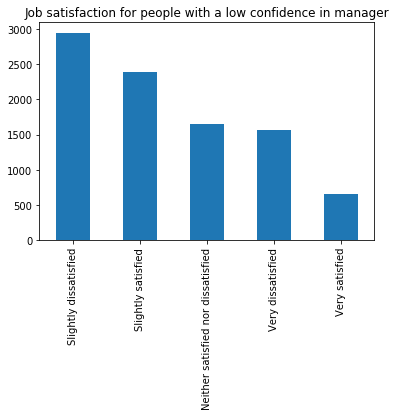

In [53]:
plt.title('Job satisfaction for people with a low confidence in manager')
df_q1_sec.loc[df_q1_sec['MgrIdiot'] == 'Not at all confident']['JobSat'].value_counts().plot(kind='bar')

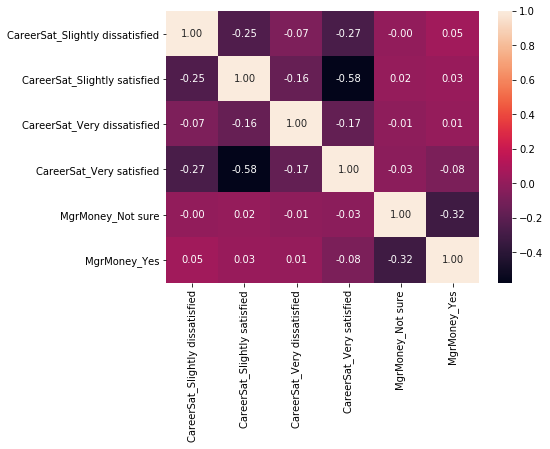

In [65]:
# Clean data for Q2
df_q2 = clean_data(df, ['CareerSat'], 'MgrMoney') 
df_q2

# correlation between career satisfaction and mangerial career for money 
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df_q2.corr(), annot=True, fmt=".2f", ax=ax);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


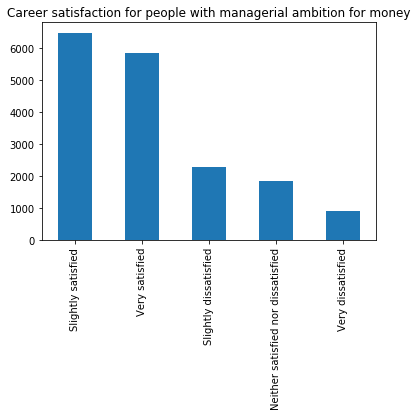

In [50]:
df_q2_sec = df[['Respondent','CareerSat', 'MgrMoney']]
plt.title('Career satisfaction for people with managerial ambition for money')
df_q2_sec.loc[df_q2_sec['MgrMoney'] == 'Yes']['CareerSat'].value_counts().plot(kind='bar')

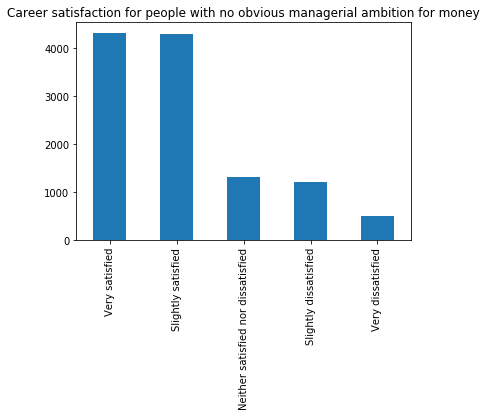

In [54]:
plt.title('Career satisfaction for people with no obvious managerial ambition for money')
df_q2_sec.loc[df_q2_sec['MgrMoney'] == 'Not sure']['CareerSat'].value_counts().plot(kind='bar')

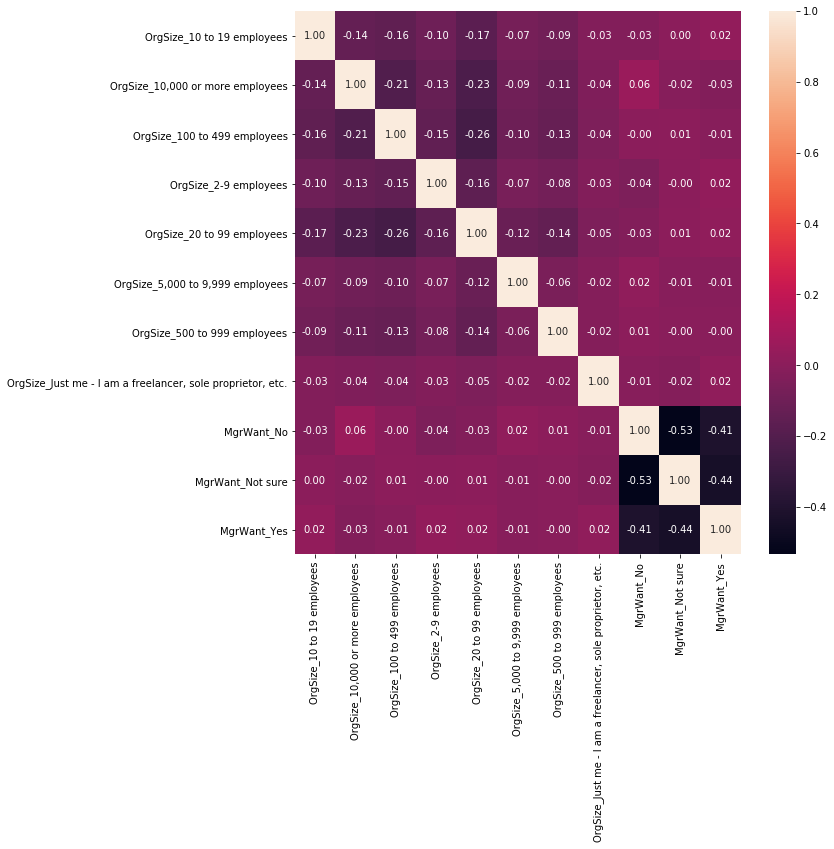

In [66]:
# Clean data for Q3
df_q3 = clean_data(df, ['OrgSize'], 'MgrWant') 
df_q3 

# correlation between size of company and mangerial ambitions
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_q3.corr(), annot=True, fmt=".2f", ax=ax);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


Answers:

1 - Yes, high level of job satisfaction has 0.32 correlation with confidence in manager, as compared to -0.06 for lowest level of satisfication. The difference between two coefficients of correlation is 0.38, which is not insignificant. 

2 - There is a relation between career satisfaction and managerial ambition for more money, but it is not very strong. Highest career satisfaction shows 0.01 correlation with that ambition whereas lowest career satisfaction shows -0.08 That make difference between two levels around 0.09, which seems statistically low. 

3 - Not very likely. Highest organization size (10000 plus employees) shows coefficient of -0.03 where as low size (2 to 9 employees) shows 0.02. Again, the difference is not big and coefficient magnitude is too low to be significant. 

